# Question: In Pac-Man, the player has a 60% chance of eating a ghost after grabbing a power pellet. If Pac-Man gets 8 chances, what is the probability he eats exactly 5 ghosts?

# In this Pac-Man game, Pac-Man has 8 chances to eat ghosts, and each time he has a 60% chance of success. Each try is independent, meaning one doesn’t affect the others. The random variable is how many ghosts he eats. A success means he eats a ghost, and a failure means he misses it. We want to find the chance he eats exactly 5 ghosts.


In [4]:
!pip install gymnasium
!pip install 'gymnasium[atari]'
!pip install gymnasium[accept-rom-license]


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [5]:
import random
import gymnasium as gym
import seaborn as sns
import ale_py
import matplotlib.pyplot as plt
all_envs = gym.envs.registry
for item in all_envs.keys():
    print(item)

CartPole-v0
CartPole-v1
MountainCar-v0
MountainCarContinuous-v0
Pendulum-v1
Acrobot-v1
phys2d/CartPole-v0
phys2d/CartPole-v1
phys2d/Pendulum-v0
LunarLander-v3
LunarLanderContinuous-v3
BipedalWalker-v3
BipedalWalkerHardcore-v3
CarRacing-v3
Blackjack-v1
FrozenLake-v1
FrozenLake8x8-v1
CliffWalking-v1
CliffWalkingSlippery-v1
Taxi-v3
tabular/Blackjack-v0
tabular/CliffWalking-v0
Reacher-v2
Reacher-v4
Reacher-v5
Pusher-v2
Pusher-v4
Pusher-v5
InvertedPendulum-v2
InvertedPendulum-v4
InvertedPendulum-v5
InvertedDoublePendulum-v2
InvertedDoublePendulum-v4
InvertedDoublePendulum-v5
HalfCheetah-v2
HalfCheetah-v3
HalfCheetah-v4
HalfCheetah-v5
Hopper-v2
Hopper-v3
Hopper-v4
Hopper-v5
Swimmer-v2
Swimmer-v3
Swimmer-v4
Swimmer-v5
Walker2d-v2
Walker2d-v3
Walker2d-v4
Walker2d-v5
Ant-v2
Ant-v3
Ant-v4
Ant-v5
Humanoid-v2
Humanoid-v3
Humanoid-v4
Humanoid-v5
HumanoidStandup-v2
HumanoidStandup-v4
HumanoidStandup-v5
GymV21Environment-v0
GymV26Environment-v0
Adventure-v0
Adventure-v4
AdventureNoFrameskip-v0
Advent

In [6]:
p_success = 0.6   # 60% chance of eating a ghost
attempts = 8      # 8 chances
successes = 0     # start counter

# --- Simulate one trial ---
for i in range(attempts):
    if random.random() < p_success:
        successes += 1  # Pac-Man eats the ghost

print(f"In one trial, Pac-Man ate {successes} ghosts out of {attempts} tries.")

In one trial, Pac-Man ate 3 ghosts out of 8 tries.


In [7]:
outcomes = ["Hit", "Miss"]

# Run one trial (one play of the Atari game)
trial_result = random.choice(outcomes)

# Show the result
print("Atari trial result:", trial_result)

Atari trial result: Hit


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


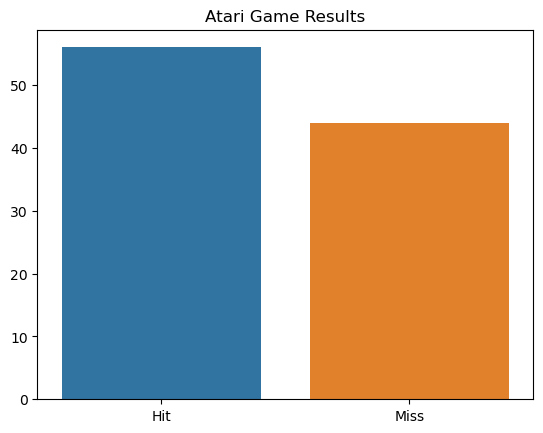

Hits: 56, Misses: 44


In [8]:
num_plays = 100  # number of Atari game plays

# Simulate the plays
outcomes = ["Hit", "Miss"]
results = [random.choice(outcomes) for _ in range(num_plays)]

# Count results
hit_count = results.count("Hit")
miss_count = results.count("Miss")

# Prepare data for bar chart
data = {"Outcome": ["Hit", "Miss"], "Count": [hit_count, miss_count]}

# Create bar chart
sns.barplot(x="Outcome", y="Count", data=data)
plt.title("Atari Game Results")
plt.show()

# Print summary
print(f"Hits: {hit_count}, Misses: {miss_count}")

A.L.E: Arcade Learning Environment (version 0.11.2+ecc1138)
[Powered by Stella]


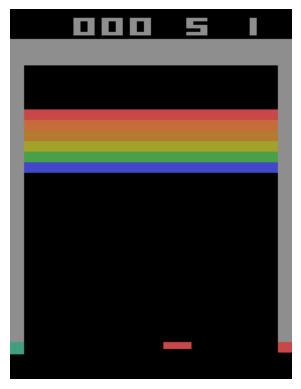

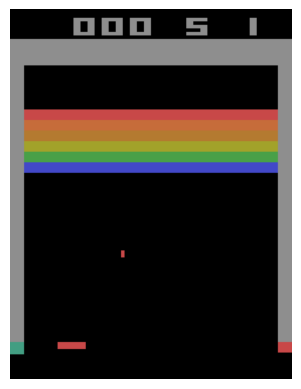

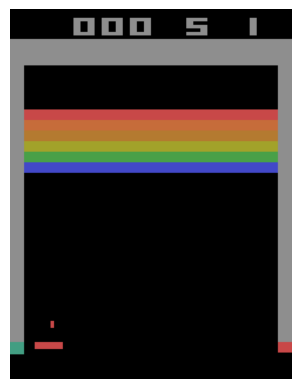

In [9]:
import gymnasium as gym
import matplotlib.pyplot as plt

# Create environment with render_mode='rgb_array'
env = gym.make("ALE/Breakout-v5", render_mode="rgb_array")
observation, info = env.reset(seed=42)

# Helper to show game frame
def show_frame(frame):
    plt.imshow(frame)
    plt.axis('off')
    plt.show()

# Run a few random steps
for step in range(30):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    if step % 10 == 0:  # Show every 10th frame
        frame = env.render()
        show_frame(frame)

    if terminated or truncated:
        observation, info = env.reset()

env.close()



In [10]:
import ale_py
import gymnasium as gym

# Register the ALE environments
gym.register_envs(ale_py)

# Now check the registry
gym.pprint_registry()

===== classic_control =====
Acrobot-v1                  CartPole-v0                 CartPole-v1
MountainCar-v0              MountainCarContinuous-v0    Pendulum-v1
===== phys2d =====
phys2d/CartPole-v0          phys2d/CartPole-v1          phys2d/Pendulum-v0
===== box2d =====
BipedalWalker-v3            BipedalWalkerHardcore-v3    CarRacing-v3
LunarLander-v3              LunarLanderContinuous-v3
===== toy_text =====
Blackjack-v1                CliffWalking-v1             CliffWalkingSlippery-v1
FrozenLake-v1               FrozenLake8x8-v1            Taxi-v3
===== tabular =====
tabular/Blackjack-v0        tabular/CliffWalking-v0
===== None =====
Ant-v2                      Ant-v3                      GymV21Environment-v0
GymV26Environment-v0        HalfCheetah-v2              HalfCheetah-v3
Hopper-v2                   Hopper-v3                   Humanoid-v2
Humanoid-v3                 HumanoidStandup-v2          InvertedDoublePendulum-v2
InvertedPendulum-v2         Pusher-v2             

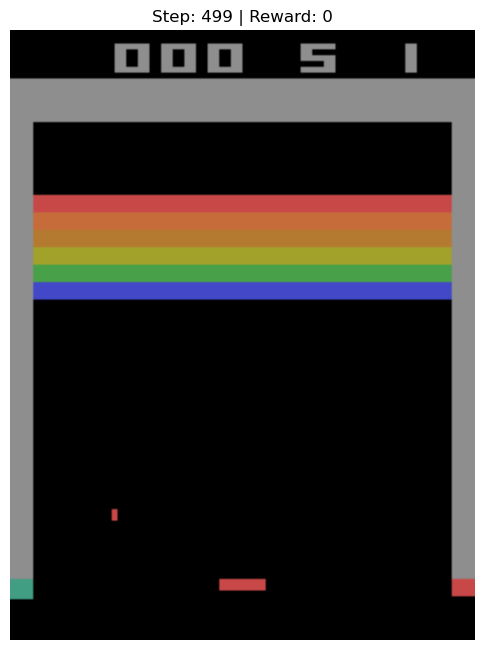

In [11]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import time

# Create environment
env = gym.make('ALE/Breakout-v5', render_mode='rgb_array')
observation, info = env.reset()

# Create figure
fig, ax = plt.subplots(figsize=(6, 8))
ax.axis('off')

total_reward = 0

for step in range(500):
    # Take action
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    
    # Clear and update display
    clear_output(wait=True)
    ax.clear()
    ax.imshow(env.render())
    ax.set_title(f"Step: {step} | Reward: {total_reward:.0f}")
    ax.axis('off')
    
    display(fig)
    
    # Add delay to make it visible (adjust this value)
    time.sleep(0.03)  # 30ms delay = ~33 fps
    
    # Reset if game over
    if terminated or truncated:
        observation, info = env.reset()
        total_reward = 0

plt.close()
env.close()

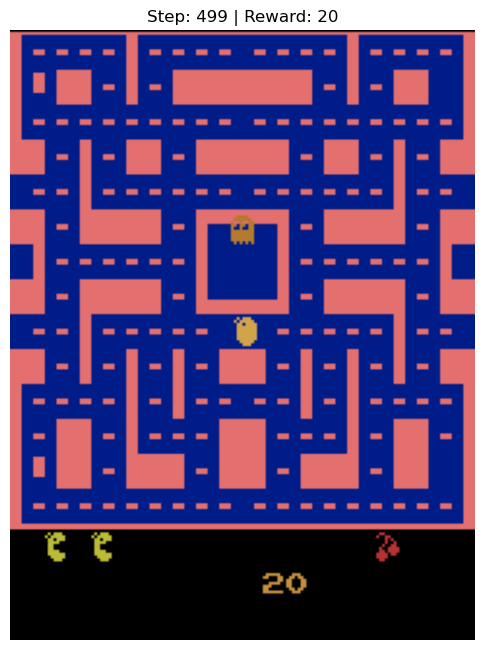

In [12]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import time

# Create Pac-Man environment
env = gym.make('ALE/MsPacman-v5', render_mode='rgb_array')
observation, info = env.reset()

# Create figure
fig, ax = plt.subplots(figsize=(6, 8))
ax.axis('off')

total_reward = 0

for step in range(500):
    # Take random action
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward

    # Render frame
    frame = env.render()  # returns RGB array
    clear_output(wait=True)
    ax.clear()
    ax.imshow(frame)
    ax.set_title(f"Step: {step} | Reward: {total_reward:.0f}")
    ax.axis('off')
    display(fig)

    # Small delay for smooth visualization
    time.sleep(0.03)

    # Reset if game over
    if terminated or truncated:
        observation, info = env.reset()
        total_reward = 0

plt.close()
env.close()


In [15]:
import numpy as np

# PARAMETERS
n_pellets = 8      # number of power-pellet chances per game
p_eat = 0.6        # probability Pac-Man eats a ghost per pellet
n_games = 100000   # number of simulated games

# SIMULATION
# Each row = one game, columns = 8 pellet trials
trials = np.random.binomial(1, p_eat, size=(n_games, n_pellets))
ghosts_eaten_per_game = trials.sum(axis=1)

# Estimate probability of exactly 5 ghosts eaten
exact_5 = np.sum(ghosts_eaten_per_game == 5)
empirical_prob = exact_5 / n_games

print(f"Estimated probability Pac-Man eats exactly 5 ghosts: {empirical_prob:.4f}")

Estimated probability Pac-Man eats exactly 5 ghosts: 0.2762


Number of trials: 1000
Number of games with exactly 5 ghosts eaten: 289
Estimated probability Pac-Man eats exactly 5 ghosts: 0.2890


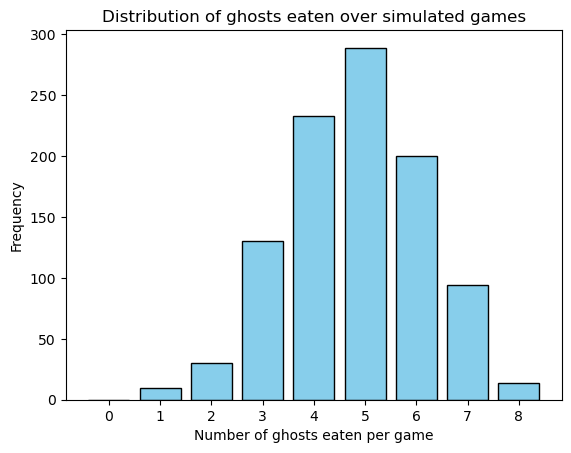

In [14]:
import numpy as np

# -----------------------------
# PARAMETERS
# -----------------------------
n_pellets = 8       # number of power-pellet chances per game
p_eat = 0.6         # probability Pac-Man eats a ghost per pellet
n_trials = 1000     # number of simulated games (>=100)

# -----------------------------
# SIMULATION
# -----------------------------
# Generate random 0/1 outcomes for each pellet in each game
# 1 = ghost eaten, 0 = ghost missed
trials = np.random.binomial(1, p_eat, size=(n_trials, n_pellets))

# Count ghosts eaten per game
ghosts_eaten_per_game = trials.sum(axis=1)

# -----------------------------
# ANALYSIS
# -----------------------------
# Probability of exactly 5 ghosts eaten
exact_5_count = np.sum(ghosts_eaten_per_game == 5)
empirical_prob = exact_5_count / n_trials

# Optional: display summary
print(f"Number of trials: {n_trials}")
print(f"Number of games with exactly 5 ghosts eaten: {exact_5_count}")
print(f"Estimated probability Pac-Man eats exactly 5 ghosts: {empirical_prob:.4f}")

# Optional: histogram of ghosts eaten distribution
import matplotlib.pyplot as plt
plt.hist(ghosts_eaten_per_game, bins=range(n_pellets+2), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.xlabel('Number of ghosts eaten per game')
plt.ylabel('Frequency')
plt.title('Distribution of ghosts eaten over simulated games')
plt.xticks(range(n_pellets+1))
plt.show()

# Conclusion: With 8 power-pellet chances and a 60% success rate( assumed probability, depends on the players skill, game difficulty and more), PAC-MAN is expected to eat 4.8 ghosts per game. The probability of exactly 5 ghosts is 27.9% and theoretically and 27.8% empirically. 